<a href="https://colab.research.google.com/github/coffema/coffema/blob/main/basra_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import cluster, datasets, metrics,impute, model_selection, feature_selection, svm, pipeline, preprocessing, decomposition
import seaborn as se
from tqdm import tqdm 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/cancer.csv'

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Print the contents of the CSV file
data

,العمر,الجنس,Cancer,المحافظة,القضاء
0,0,انثى,Bone marrow,محافظة البصرة,قضاء البصرة (المرکز)
1,0,ذکر,"Connective, Subcutaneous and other soft tissue...",محافظة البصرة,قضاء الزبير (المرکز)
2,1,انثى,Liver,محافظة البصرة,الزبير ناحية صفوان
3,1,ذکر,"Long bones of upper limb, scapula and associat...",محافظة البصرة,قضاء البصرة (المرکز)
4,1,ذکر,Bone marrow,محافظة البصرة,قضاء البصرة (المرکز)
...,...,...,...,...,...
2334,66,انثى,"Pancreas, NOS",محافظة البصرة,قضاء البصرة (المرکز)
2335,68,ذکر,"Kidney, NOS",محافظة البصرة,قضاء البصرة (المرکز)
2336,69,انثى,Thyroid gland,محافظة البصرة,قضاء البصرة (المرکز)
2337,72,ذکر,"Stomach, NOS",محافظة البصرة,قضاء البصرة (المرکز)


In [ ]:
# Drop the following columns 
# ['المحافظة']
data.drop(columns=['المحافظة'],inplace=True,axis=1)
data

,العمر,الجنس,Cancer,القضاء
0,0,انثى,Bone marrow,قضاء البصرة (المرکز)
1,0,ذکر,"Connective, Subcutaneous and other soft tissue...",قضاء الزبير (المرکز)
2,1,انثى,Liver,الزبير ناحية صفوان
3,1,ذکر,"Long bones of upper limb, scapula and associat...",قضاء البصرة (المرکز)
4,1,ذکر,Bone marrow,قضاء البصرة (المرکز)
...,...,...,...,...
2334,66,انثى,"Pancreas, NOS",قضاء البصرة (المرکز)
2335,68,ذکر,"Kidney, NOS",قضاء البصرة (المرکز)
2336,69,انثى,Thyroid gland,قضاء البصرة (المرکز)
2337,72,ذکر,"Stomach, NOS",قضاء البصرة (المرکز)


# Describe the dataset.

In [ ]:
data.describe()

,العمر
count,2339.000000
mean,51.282172
std,20.537139
min,0.000000
25%,40.000000
50%,54.000000
75%,67.000000
max,106.000000


# Show the dataset info.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   العمر   2339 non-null   int64 
 1   الجنس   2339 non-null   object
 2   Cancer  2339 non-null   object
 3   القضاء  2339 non-null   object
dtypes: int64(1), object(3)
memory usage: 73.2+ KB


# Get the number of missing values.

In [ ]:
data.isna().sum()

العمر     0
الجنس     0
Cancer    0
القضاء    0
dtype: int64

In [ ]:
data['الجنس']

0       انثى
1        ذکر
2       انثى
3        ذکر
4        ذکر
        ... 
2334    انثى
2335     ذکر
2336    انثى
2337     ذکر
2338    انثى
Name: الجنس, Length: 2339, dtype: object

In [ ]:
uni = data['الجنس'].unique()
E= {}
for index ,feat in enumerate(uni):
  E[feat] = index
data['الجنس'].replace(E,inplace = True)

In [ ]:
uni2 = data['القضاء'].unique()
E= {}
for index ,feat in enumerate(uni2):
  E[feat] = index
data['القضاء'].replace(E,inplace = True)

In [ ]:
data

,العمر,الجنس,Cancer,القضاء
0,0,0,Bone marrow,0
1,0,1,"Connective, Subcutaneous and other soft tissue...",1
2,1,0,Liver,2
3,1,1,"Long bones of upper limb, scapula and associat...",0
4,1,1,Bone marrow,0
...,...,...,...,...
2334,66,0,"Pancreas, NOS",0
2335,68,1,"Kidney, NOS",0
2336,69,0,Thyroid gland,0
2337,72,1,"Stomach, NOS",0


# Plot the target column.

<Axes: ylabel='القضاء'>

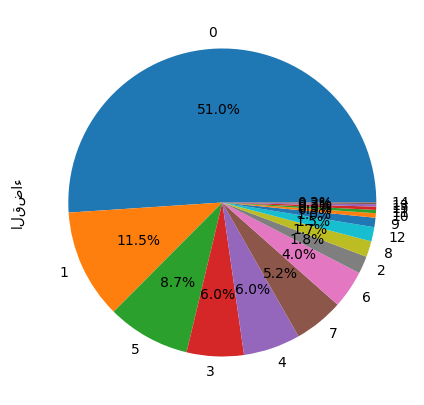

In [ ]:
data.القضاء.value_counts().plot.pie(figsize = (5,5),
                                        autopct = '%1.1f%%')

<Axes: ylabel='Cancer'>

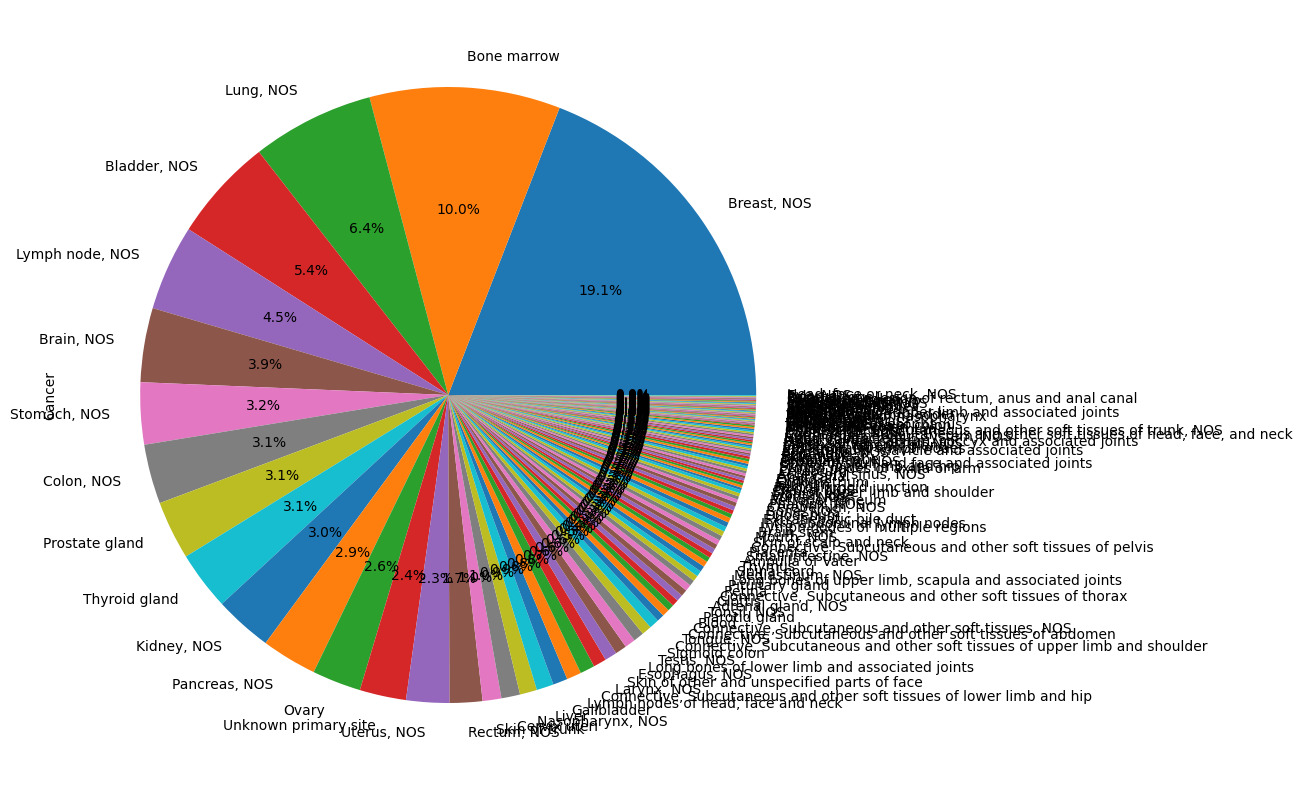

In [ ]:
data.Cancer.value_counts().plot.pie(figsize = (10,10),
                                        autopct = '%1.1f%%')

In [ ]:
uni3 = data['Cancer'].unique()
E= {}
for index ,feat in enumerate(uni3):
  E[feat] = index
data['Cancer'].replace(E,inplace = True)

In [ ]:
data.corr()

,العمر,الجنس,Cancer,القضاء
العمر,1.000000,0.015778,0.333335,-0.053548
الجنس,0.015778,1.000000,-0.097296,0.046898
Cancer,0.333335,-0.097296,1.000000,-0.029614
القضاء,-0.053548,0.046898,-0.029614,1.000000
